<a href="https://colab.research.google.com/github/Jorcelyn/Aliyun-Python/blob/main/%E2%80%9CFIS_Case2_ipynb%E2%80%9Dcase2%E4%BF%AE%E6%94%B9%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/LUCIDresearch/JuzzyPython.git

Cloning into 'JuzzyPython'...
remote: Enumerating objects: 2468, done.
remote: Counting objects: 100% (2468/2468), done.
remote: Compressing objects: 100% (852/852), done.
remote: Total 2468 (delta 1590), reused 2468 (delta 1590), pack-reused 0
Receiving objects: 100% (2468/2468), 4.66 MiB | 21.00 MiB/s, done.
Resolving deltas: 100% (1590/1590), done.


In [ ]:
#!pip install juzzyPython
!pip install ./JuzzyPython

Processing ./JuzzyPython
  Preparing metadata (setup.py) ... done
  Created wheel for JuzzyPython: filename=JuzzyPython-1.0-py3-none-any.whl size=120669 sha256=f41f96052606dce68da5bec88821e693779cea67752ba586b34b612443cd3655
  Stored in directory: /tmp/pip-ephem-wheel-cache-59aiwqcn/wheels/ac/e6/4f/764ef17d3a9b5a0ea69e7c63cb8c91b868ee3426e9fd88e69d
Successfully built JuzzyPython


In [ ]:
import numpy as np
from juzzyPython.generic.Tuple import Tuple
from juzzyPython.generic.Output import Output
from juzzyPython.generic.Input import Input
from juzzyPython.type1.system.T1_Rule import T1_Rule
from juzzyPython.type1.system.T1_Antecedent import T1_Antecedent
from juzzyPython.type1.system.T1_Consequent import T1_Consequent
from juzzyPython.type1.system.T1_Rulebase import T1_Rulebase
from juzzyPython.type1.sets.T1MF_Gaussian import T1MF_Gaussian
from juzzyPython.type1.sets.T1MF_Triangular import T1MF_Triangular
import matplotlib.pyplot as plt

推理结果: 99.3249670056914


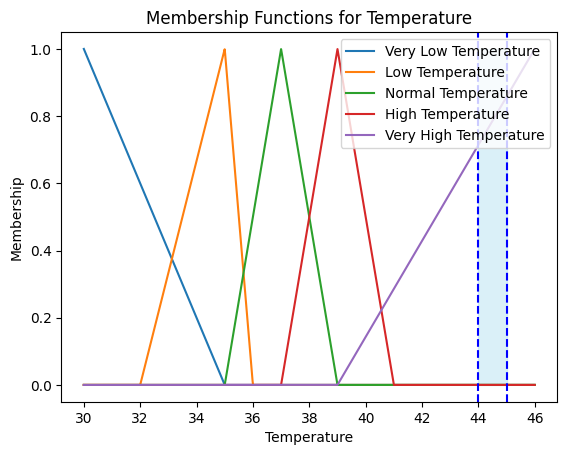

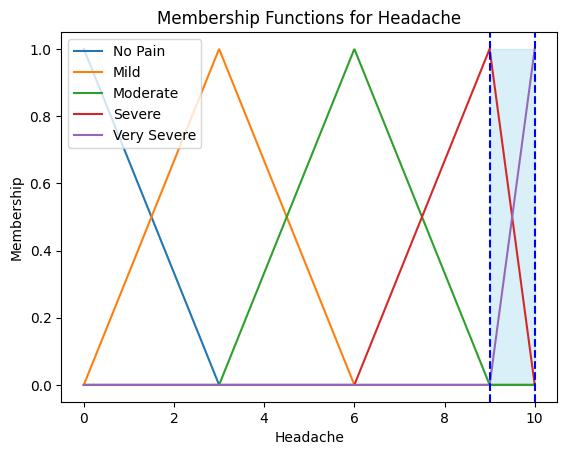

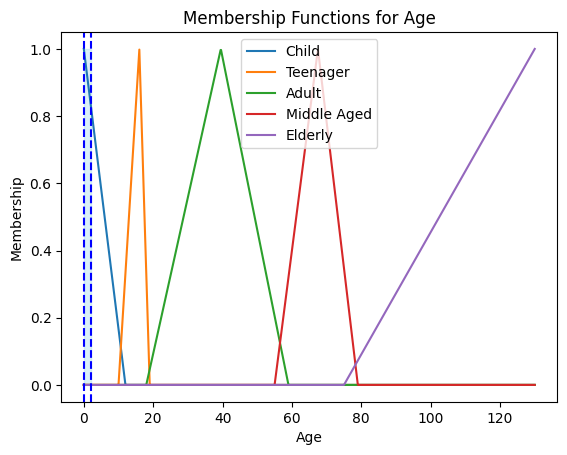

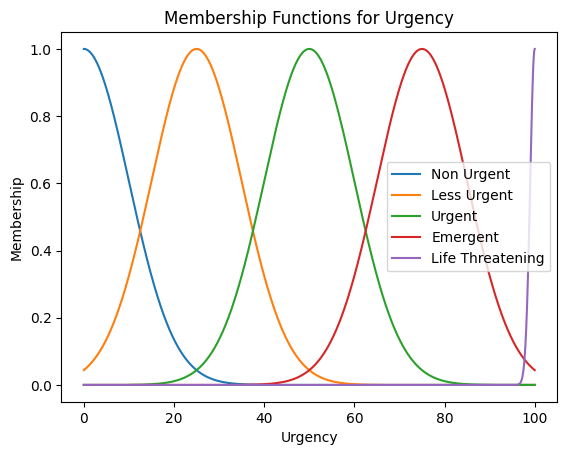

In [ ]:
class MedicalFuzzySystem:
    def __init__(self):
        # 创建输入变量及其隶属度函数
        self.temperature = Input("Temperature", Tuple(30, 46))
        self.temp_very_low = T1MF_Triangular("Very Low Temperature", 30, 30, 35)
        self.temp_low = T1MF_Triangular("Low Temperature", 32, 35, 36)
        self.temp_normal = T1MF_Triangular("Normal Temperature", 35, 37, 39)
        self.temp_high = T1MF_Triangular("High Temperature", 37, 39, 41)
        self.temp_very_high = T1MF_Triangular("Very High Temperature", 39, 46, 46)

        self.headache = Input("Headache", Tuple(0, 10))
        self.headache_no_pain = T1MF_Triangular("No Pain", 0, 0, 3)
        self.headache_mild = T1MF_Triangular("Mild", 0, 3, 6)
        self.headache_moderate = T1MF_Triangular("Moderate", 3, 6, 9)
        self.headache_severe = T1MF_Triangular("Severe", 6, 9, 10)
        self.headache_very_severe = T1MF_Triangular("Very Severe", 9, 10, 10)

        self.age = Input("Age", Tuple(0, 130))
        self.age_child = T1MF_Triangular("Child", 0, 0, 12)
        self.age_teenager = T1MF_Triangular("Teenager", 10, 16, 19)
        self.age_adult = T1MF_Triangular("Adult", 18, 39.5, 59)
        self.age_middle_aged = T1MF_Triangular("Middle Aged", 55, 67.5, 79)
        self.age_elderly = T1MF_Triangular("Elderly", 75, 130, 130)

        # 创建输出变量
        self.urgency = Output("Urgency", Tuple(0, 100))
        self.urgency_non_urgent = T1MF_Gaussian("Non Urgent", 0, 10)
        self.urgency_less_urgent = T1MF_Gaussian("Less Urgent", 25, 10)
        self.urgency_urgent = T1MF_Gaussian("Urgent", 50, 10)
        self.urgency_emergent = T1MF_Gaussian("Emergent", 75, 10)
        self.urgency_life_threatening = T1MF_Gaussian("Life Threatening", 100, 1)

        # 设置前提和结论
        ant_temp_very_low = T1_Antecedent(self.temp_very_low, self.temperature, "Very Low Temperature")
        ant_temp_low = T1_Antecedent(self.temp_low, self.temperature, "Low Temperature")
        ant_temp_normal = T1_Antecedent(self.temp_normal, self.temperature, "Normal Temperature")
        ant_temp_high = T1_Antecedent(self.temp_high, self.temperature, "High Temperature")
        ant_temp_very_high = T1_Antecedent(self.temp_very_high, self.temperature, "Very High Temperature")

        ant_headache_no_pain = T1_Antecedent(self.headache_no_pain, self.headache, "No Pain")
        ant_headache_mild = T1_Antecedent(self.headache_mild, self.headache, "Mild")
        ant_headache_moderate = T1_Antecedent(self.headache_moderate, self.headache, "Moderate")
        ant_headache_severe = T1_Antecedent(self.headache_severe, self.headache, "Severe")
        ant_headache_very_severe = T1_Antecedent(self.headache_very_severe, self.headache, "Very Severe")

        ant_age_child = T1_Antecedent(self.age_child, self.age, "Child")
        ant_age_teenager = T1_Antecedent(self.age_teenager, self.age, "Teenager")
        ant_age_adult = T1_Antecedent(self.age_adult, self.age, "Adult")
        ant_age_middle_aged = T1_Antecedent(self.age_middle_aged, self.age, "Middle Aged")
        ant_age_elderly = T1_Antecedent(self.age_elderly, self.age, "Elderly")

        con_urgency_non_urgent = T1_Consequent(self.urgency_non_urgent, self.urgency, "Non Urgent")
        con_urgency_less_urgent = T1_Consequent(self.urgency_less_urgent, self.urgency, "Less Urgent")
        con_urgency_urgent = T1_Consequent(self.urgency_urgent, self.urgency, "Urgent")
        con_urgency_emergent = T1_Consequent(self.urgency_emergent, self.urgency, "Emergent")
        con_urgency_life_threatening = T1_Consequent(self.urgency_life_threatening, self.urgency, "Life Threatening")

        # 定义模糊规则
        self.rulebase = T1_Rulebase()

        # 在 MedicalFuzzySystem 类中添加规则

        # Rule 1
        self.rulebase.addRule(T1_Rule([ant_temp_normal, ant_headache_no_pain], con_urgency_non_urgent))

        # Rule 2
        self.rulebase.addRule(T1_Rule([ant_temp_very_low, ant_headache_very_severe], con_urgency_life_threatening))
        self.rulebase.addRule(T1_Rule([ant_temp_very_high, ant_headache_very_severe], con_urgency_life_threatening))

        # Rule 3
        self.rulebase.addRule(T1_Rule([ant_temp_normal, ant_headache_mild], con_urgency_less_urgent))
        self.rulebase.addRule(T1_Rule([ant_temp_normal, ant_headache_moderate], con_urgency_less_urgent))
        self.rulebase.addRule(T1_Rule([ant_temp_low, ant_headache_no_pain], con_urgency_less_urgent))
        self.rulebase.addRule(T1_Rule([ant_temp_high, ant_headache_no_pain], con_urgency_less_urgent))
        self.rulebase.addRule(T1_Rule([ant_temp_very_high, ant_headache_no_pain], con_urgency_less_urgent))
        self.rulebase.addRule(T1_Rule([ant_temp_very_low, ant_headache_no_pain], con_urgency_less_urgent))

        # Rule 4
        self.rulebase.addRule(T1_Rule([ant_temp_normal, ant_headache_severe], con_urgency_urgent))
        self.rulebase.addRule(T1_Rule([ant_temp_normal, ant_headache_very_severe], con_urgency_urgent))
        self.rulebase.addRule(T1_Rule([ant_temp_low, ant_headache_mild], con_urgency_urgent))
        self.rulebase.addRule(T1_Rule([ant_temp_low, ant_headache_moderate], con_urgency_urgent))
        self.rulebase.addRule(T1_Rule([ant_temp_high, ant_headache_mild], con_urgency_urgent))
        self.rulebase.addRule(T1_Rule([ant_temp_high, ant_headache_moderate], con_urgency_urgent))
        self.rulebase.addRule(T1_Rule([ant_temp_very_low, ant_headache_mild], con_urgency_urgent))
        self.rulebase.addRule(T1_Rule([ant_temp_very_low, ant_headache_moderate], con_urgency_urgent))
        self.rulebase.addRule(T1_Rule([ant_temp_very_high, ant_headache_mild], con_urgency_urgent))
        self.rulebase.addRule(T1_Rule([ant_temp_very_high, ant_headache_moderate], con_urgency_urgent))

        # Rule 5
        self.rulebase.addRule(T1_Rule([ant_temp_low, ant_headache_severe], con_urgency_emergent))
        self.rulebase.addRule(T1_Rule([ant_temp_very_low, ant_headache_severe], con_urgency_emergent))
        self.rulebase.addRule(T1_Rule([ant_temp_low, ant_headache_very_severe], con_urgency_emergent))
        self.rulebase.addRule(T1_Rule([ant_temp_high, ant_headache_severe], con_urgency_emergent))
        self.rulebase.addRule(T1_Rule([ant_temp_very_high, ant_headache_severe], con_urgency_emergent))
        self.rulebase.addRule(T1_Rule([ant_temp_high, ant_headache_very_severe], con_urgency_emergent))

        #年龄影响
        # Rule 6
        self.rulebase.addRule(T1_Rule([ant_age_elderly, ant_temp_very_high, ant_headache_severe], con_urgency_life_threatening))
        self.rulebase.addRule(T1_Rule([ant_age_child, ant_temp_very_high, ant_headache_severe], con_urgency_life_threatening))

        # Rule 7
        self.rulebase.addRule(T1_Rule([ant_age_elderly, ant_temp_high, ant_headache_very_severe], con_urgency_life_threatening))
        self.rulebase.addRule(T1_Rule([ant_age_child, ant_temp_high, ant_headache_very_severe], con_urgency_life_threatening))


    def evaluate(self, temp_interval, head_interval, age_interval):
        # 对输入区间进行评估
        temp_values = np.arange(temp_interval.getLeft(), temp_interval.getRight() + 1, 1)
        head_values = np.arange(head_interval.getLeft(), head_interval.getRight() + 1, 1)
        age_values = np.arange(age_interval.getLeft(), age_interval.getRight() + 1, 1)

        urgency_values = []
        for temp_val in temp_values:
            for head_val in head_values:
                for age_val in age_values:
                    self.temperature.setInput(temp_val)
                    self.headache.setInput(head_val)
                    self.age.setInput(age_val)

                    # 执行模糊推理，并获取输出字典
                    output_dict = self.rulebase.evaluate(1)  # 使用质心去模糊化方法

                    # 从输出字典中获取与 self.urgency 相关联的值
                    urgency_val = output_dict[self.urgency]
                    urgency_values.append(urgency_val)

        # 计算区间推理的平均值
        return np.mean(urgency_values)

    def plot_membership_functions(self, input_var, mf_list, var_name, input_range=None):
        """绘制隶属度函数图，并显示输入区间"""
        x_values = np.linspace(input_var.getDomain().getLeft(), input_var.getDomain().getRight(), 1000)
        plt.figure()
        for mf in mf_list:
            y_values = [mf.getFS(x) for x in x_values]
            plt.plot(x_values, y_values, label=mf.getName())

        # 如果提供了输入区间，则在图上绘制该区间
        if input_range is not None:
            # 绘制区间的垂直线
            plt.axvline(input_range.getLeft(), color='blue', linestyle='--')
            plt.axvline(input_range.getRight(), color='blue', linestyle='--')

            # 填充区间区域
            plt.fill_betweenx([0, 1], input_range.getLeft(), input_range.getRight(), color='skyblue', alpha=0.3)

        plt.title(f"Membership Functions for {var_name}")
        plt.xlabel(var_name)
        plt.ylabel("Membership")
        plt.legend()
        plt.show()

    def plot_all_membership_functions(self, temp_range=None, head_range=None, age_range=None):
        """绘制所有隶属度函数，并显示输入区间"""
        self.plot_membership_functions(self.temperature, [self.temp_very_low, self.temp_low, self.temp_normal, self.temp_high, self.temp_very_high], "Temperature", temp_range)
        self.plot_membership_functions(self.headache, [self.headache_no_pain, self.headache_mild, self.headache_moderate, self.headache_severe, self.headache_very_severe], "Headache", head_range)
        self.plot_membership_functions(self.age, [self.age_child, self.age_teenager, self.age_adult, self.age_middle_aged, self.age_elderly], "Age", age_range)
        self.plot_membership_functions(self.urgency, [self.urgency_non_urgent, self.urgency_less_urgent, self.urgency_urgent, self.urgency_emergent, self.urgency_life_threatening], "Urgency")



# 实例化并测试系统
fuzzy_system = MedicalFuzzySystem()
result = fuzzy_system.evaluate(Tuple(42, 44), Tuple(10, 10), Tuple(0, 2))
print("推理结果:", result)

# 绘制所有隶属度函数并显示输入区间
fuzzy_system.plot_all_membership_functions(Tuple(44, 45), Tuple(9, 10), Tuple(0, 2))
